# Gradient Descent - Exercises

### Setup and Preparation

In the following, we want to find the minimum of function ``f_quad`` using gradient descent.
The functions ``f_quad_dw`` and ``f_quad_db`` are the partial derivatives of ``f_quad``.

Make sure to execute the following code cells so that the definitions are loaded into your kernel.

In [ ]:
def f_quad(w, b):
    return (w * 2.5 - 3)**2 + (b * 1.7 + 1)**2

def f_quad_dw(w, b):
    return 2 * (w * 2.5 - 3) * 2.5

def f_quad_db(w, b):
    return 2 * (b * 1.7 + 1) * 1.7

In [ ]:
import numpy as np

def f_log(w, b):
    return np.log(f_quad(w, b))

The following code cells create plots of the function ``f_quad``.

Make sure to execute the following code cells to have the definitions loaded to your kernel.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

def get_value_grid(x_min, x_max, y_min, y_max, z_func):
    xs = np.linspace(x_min, x_max, num=50, endpoint=True)
    ys = np.linspace(y_min, y_max, num=50, endpoint=True)
    X, Y = np.meshgrid(xs, ys)
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        Z[i, :] = z_func(X[i, :], Y[i, :])
    return X, Y, Z

def plot_3D(X, Y, Z):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, 
                           cmap=cm.rainbow,
                           linewidth=0, 
                           antialiased=False)
            
X, Y, Z = get_value_grid(-10, 10, -10, 10, f_quad)
plot_3D(X, Y, Z)
plt.show()

In [ ]:
def plot_2D_color_encoded(X, Y, Z):    
    plt.figure()
    plt.scatter(X, Y, c=Z, cmap=cm.rainbow)
    plt.colorbar()
    plt.xlabel("X")
    plt.ylabel("Y")

plt.figure()
plot_2D_color_encoded(X, Y, Z)
plt.show()

## Exercise: Gradient Descent

Implement the function ``gradient_descent_step_2d(x_0, y_0, target_fn, target_fn_dx, target_fn_dy, step_size)``
which performs one step of gradient descent for a function ``target_fn`` which takes two arguments ``x,y``.
The function takes the current position ``x_0, y_0``,
the function to be minimized,
its partial derivatives w.r.t. ``x`` and ``y``,
as well as the step size for the gradient descent step as input.
A tuple ``x_1, y_1`` indicating the position after one step of gradient descent shall be returned.

In [ ]:
def gradient_descent_step_2d(x_0, y_0, target_fn, target_fn_dx, target_fn_dy, step_size):
    ### YOUR SOLUTION HERE
    dx = target_fn_dx(x_0, y_0)
    dy = target_fn_dy(x_0, y_0)

    x_1 = x_0 - step_size*dx
    y_1 = y_0 - step_size*dy
    return x_1, y_1
    ### END OF SOLUTION

The following code cell contains a small test case for your implementation.

You should be able to execute it without any errors.

In [ ]:
x_1, y_1 = gradient_descent_step_2d(0, 1, lambda x, y: 2*x - y, lambda x, y: 2, lambda x, y: -1, 0.1)
assert np.isclose(x_1, -0.2)
assert np.isclose(y_1, 1.1)

Implement a function ``gradient_descent(x_0, y_0, target_fn, target_fn_dx, target_fn_dy, step_size, stop_eps, max_iter)``
which performs multiple steps of gradient descent for a real-valued target function ``target_fn`` with two inputs ``x, y``.
Write the position after each iteration of gradient descent in two arrays ``xs`` and ``ys``.
The gradient descent stops, when the squared Euclidean distance between two succeeding positions is smaller than some threshold value ``stop_eps``,
or after performing ``max_iter`` steps, whichever comes first.

The function returns the two arrays ``xs`` and ``ys`` containing the positions after each iteration of gradient descent,
including the starting positions ``x_0`` and ``y_0``, respectively. 

Within your function, consider using print statements for debugging and tracing purposes.

In [27]:
def gradient_descent(x_0, y_0, target_fn, target_fn_dx, target_fn_dy, step_size, stop_eps, max_iter):
    xs = [x_0]
    ys = [y_0]
    f_value = target_fn(xs[-1], ys[-1])
    ### YOUR SOLUTION HERE
    print("{:20s} - {:>14s}, {:>24s}".format("Iteration", "Step Size", "Target function value"))
    for i in range(max_iter):
        x, y = gradient_descent_step_2d(xs[i], ys[i], target_fn, target_fn_dx, target_fn_dy, step_size)

        xs.append(x)
        ys.append(y)

        sq_diff = (xs[i+1] - xs[i]) ** 2 + (ys[i+1] - ys[i]) ** 2
        f_value = target_fn(xs[i+1], ys[i+1])
        print(f"{i+1:^20d} - {sq_diff:>14.6e}, {f_value:>24.6e}")

        if sq_diff < stop_eps:
            break
                  
    ### END OF SOLUTION
    return xs, ys

Using the functions implemented above, find the minimum of the above-defined target function ``f_quad``.
Use parameters values ``x_0 = 0, y_0 = 0`` for the starting point and a maximum of ``max_iter = 100`` iterations.
As stopping criteria, use ``stop_eps = 1e-6``.

Try to find the learning rate which requires a minimal amount of iterations to reach the function's minimum.

In [28]:
# Find a good learning rate!
### YOUR SOLUTION HERE
xs, ys = gradient_descent(0, 0, f_quad, f_quad_dw, f_quad_db, 0.1, 1e-6, 100)
print(xs, ys)
### END OF SOLUTION

Iteration            -      Step Size,    Target function value
         1           -   2.365600e+00,             7.405840e-01
         2           -   1.612115e-01,             6.687016e-02
         3           -   1.245519e-02,             7.845006e-03
         4           -   1.202195e-03,             1.143101e-03
         5           -   1.505995e-04,             1.876950e-04
         6           -   2.285111e-05,             3.243341e-05
         7           -   3.821400e-06,             5.713867e-06
         8           -   6.650292e-07,             1.013673e-06
[0, 1.5, 1.125, 1.21875, 1.1953125, 1.201171875, 1.19970703125, 1.2000732421875, 1.199981689453125] [0, -0.34, -0.48348, -0.54402856, -0.56958005232, -0.58036278207904, -0.5849130940373549, -0.5868333256837638, -0.5876436634385483]


What happens if you choose learning rates which are significantly larger or smaller?

In [29]:
# Try out a significantly smaller learning rate and interpret the results!
### YOUR SOLUTION HERE
xs, ys = gradient_descent(0, 0, f_quad, f_quad_dw, f_quad_db, 0.0001, 1e-6, 100)
print(xs, ys)
### END OF SOLUTION

Iteration            -      Step Size,    Target function value
         1           -   2.365600e-06,             9.976358e+00
         2           -   2.359845e-06,             9.952774e+00
         3           -   2.354104e-06,             9.929248e+00
         4           -   2.348377e-06,             9.905778e+00
         5           -   2.342665e-06,             9.882366e+00
         6           -   2.336966e-06,             9.859010e+00
         7           -   2.331282e-06,             9.835712e+00
         8           -   2.325611e-06,             9.812470e+00
         9           -   2.319955e-06,             9.789284e+00
         10          -   2.314313e-06,             9.766155e+00
         11          -   2.308684e-06,             9.743082e+00
         12          -   2.303069e-06,             9.720066e+00
         13          -   2.297468e-06,             9.697105e+00
         14          -   2.291881e-06,             9.674200e+00
         15          -   2.286308e-06,  

In [31]:
# Try out a significantly larger learning rate and interpret the results!
### YOUR SOLUTION HERE
xs, ys = gradient_descent(0, 0, f_quad, f_quad_dw, f_quad_db, 1, 1e-6, 100)
print(xs, ys)
### END OF SOLUTION

Iteration            -      Step Size,    Target function value
         1           -   2.365600e+02,             1.213098e+03
         2           -   3.002038e+04,             1.579326e+05
         3           -   3.941299e+06,             2.082947e+07
         4           -   5.205766e+08,             2.753393e+09
         5           -   6.883116e+10,             3.641064e+11
         6           -   9.102577e+12,             4.815239e+13
         7           -   1.203808e+15,             6.368138e+15
         8           -   1.592034e+17,             8.421860e+17
         9           -   2.105465e+19,             1.113791e+20
         10          -   2.784477e+21,             1.472988e+22
         11          -   3.682471e+23,             1.948027e+24
         12          -   4.870068e+25,             2.576266e+26
         13          -   6.440665e+27,             3.407112e+28
         14          -   8.517779e+29,             4.505905e+30
         15          -   1.126476e+32,  

The functions in the following code cell can be used to visualize the gradient descent process.
Make sure to execute the code cells to have the definitions loaded to your kernel.

In [33]:
def draw_descent_steps(xs, ys):
    plt.plot(xs, ys, color=(1,1,1))
    plotted_steps = len(xs)
    plt.text(xs[0], ys[0], 1, color=(0,0,0))
    plt.text(xs[-1], ys[-1], plotted_steps, color=(0,0,0))
    
def plot_gradient_descent_process(xs, ys, target_fn, num_steps, x_true, y_true):
    if num_steps < len(xs):
        xs = xs[:num_steps]
        ys = ys[:num_steps]
    x_min = np.min(xs)
    x_max = np.max(xs)
    y_min = np.min(ys)
    y_max = np.max(ys)
    
    X, Y, Z = get_value_grid(x_min-1, x_max+1, y_min-1, y_max+1, target_fn)
    plot_2D_color_encoded(X, Y, Z)
    
    draw_descent_steps(xs, ys)
    
    plt.scatter(x_true, y_true, marker='o', color=(0,1,0))

Use the function ``plot_gradient_descent_process`` to visualize what happens in case of
* good choice of learning rate
* too small learning rate
* too large learning rate

Iteration            -      Step Size,    Target function value
         1           -   2.365600e+00,             7.405840e-01
         2           -   1.612115e-01,             6.687016e-02
         3           -   1.245519e-02,             7.845006e-03
         4           -   1.202195e-03,             1.143101e-03
         5           -   1.505995e-04,             1.876950e-04
         6           -   2.285111e-05,             3.243341e-05
         7           -   3.821400e-06,             5.713867e-06
         8           -   6.650292e-07,             1.013673e-06


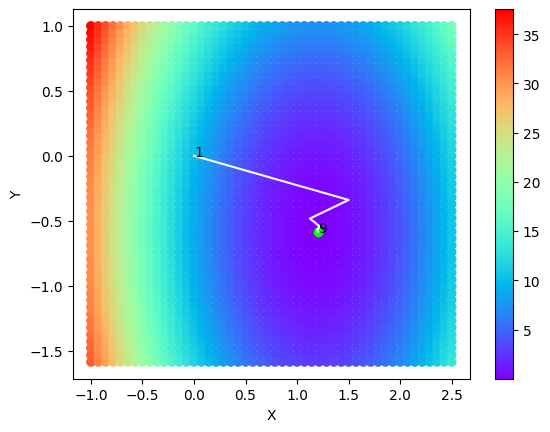

In [48]:
# This cell: Good choice of learning rate!
### YOUR SOLUTION HERE
# 1) Use the function gradient_descent to perform gradient descent and get a sequence of x-y-Positions
xs, ys = gradient_descent(0, 0, f_quad, f_quad_dw, f_quad_db, 0.1, 1e-6, 100)
# 2) Use the function plot_gradient_descent_process to create a plot of the sequence
plot_gradient_descent_process(xs, ys, f_quad, 10, 3/2.5, -1/1.7)
### END OF SOLUTION
# Show plot
plt.show()

Iteration            -      Step Size,    Target function value
         1           -   2.365600e-02,             7.778366e+00
         2           -   1.825279e-02,             6.063719e+00
         3           -   1.410011e-02,             4.738772e+00
         4           -   1.090665e-02,             3.713556e+00
         5           -   8.449165e-03,             2.919035e+00
         6           -   6.556566e-03,             2.302215e+00
         7           -   5.097704e-03,             1.822404e+00
         8           -   3.972024e-03,             1.448339e+00
         9           -   3.102420e-03,             1.155989e+00
         10          -   2.429743e-03,             9.268707e-01
         11          -   1.908612e-03,             7.467576e-01
         12          -   1.504194e-03,             6.046912e-01
         13          -   1.189745e-03,             4.922221e-01
         14          -   9.447174e-04,             4.028288e-01
         15          -   7.533220e-04,  

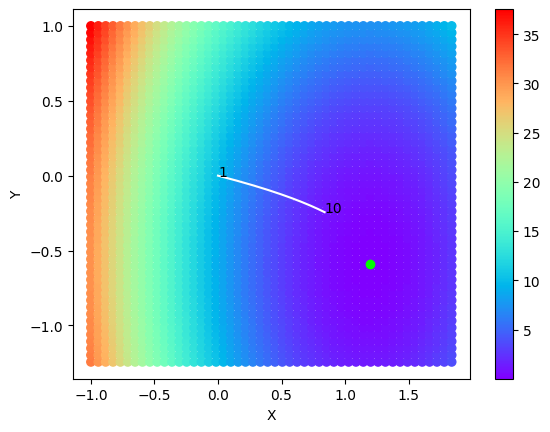

In [49]:
# This cell: Too small choice of learning rate!
### YOUR SOLUTION HERE
# 1) Use the function gradient_descent to perform gradient descent and get a sequence of x-y-Positions
xs, ys = gradient_descent(0, 0, f_quad, f_quad_dw, f_quad_db, 0.01, 1e-6, 100)
# 2) Use the function plot_gradient_descent_process to create a plot of the sequence
plot_gradient_descent_process(xs, ys, f_quad, 10, 3/2.5, -1/1.7)
### END OF SOLUTION
# Show plot
plt.show()

Iteration            -      Step Size,    Target function value
         1           -   2.129040e+01,             6.860126e+01
         2           -   1.537011e+02,             5.150129e+02
         3           -   1.158428e+03,             3.892746e+03
         4           -   8.758490e+03,             2.943780e+04
         5           -   6.623494e+04,             2.226227e+05
         6           -   5.009011e+05,             1.683584e+06
         7           -   3.788064e+06,             1.273211e+07
         8           -   2.864724e+07,             9.628655e+07
         9           -   2.166447e+08,             7.281670e+08
         10          -   1.638376e+09,             5.506763e+09
         11          -   1.239022e+10,             4.164490e+10
         12          -   9.370101e+10,             3.149395e+11
         13          -   7.086139e+11,             2.381730e+12
         14          -   5.358893e+12,             1.801183e+13
         15          -   4.052663e+13,  

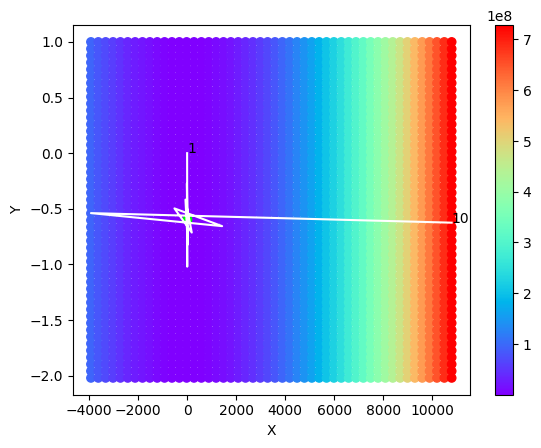

In [50]:
# This cell: Too large choice of learning rate!
### YOUR SOLUTION HERE
# 1) Use the function gradient_descent to perform gradient descent and get a sequence of x-y-Positions
xs, ys = gradient_descent(0, 0, f_quad, f_quad_dw, f_quad_db, 0.3, 1e-6, 100)

# 2) Use the function plot_gradient_descent_process to create a plot of the sequence
plot_gradient_descent_process(xs, ys, f_quad, 10, 3/2.5, -1/1.7)
### END OF SOLUTION
# Show plot
plt.show()